In [42]:
#plot figure 6

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pybedtools import BedTool
import scipy.stats as ss
from statsmodels.sandbox.stats.multicomp import multipletests as mlpt

In [44]:
commonFontsize=8

def config_rcparams():    
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial' 
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3

config_rcparams()



In [45]:
#hela gene ase table, chr8
df_fil=pd.read_csv('./gene_ase.tsv', sep='\t')
df_fil

,gene,total_rna,rna[A],rnaA/total,dnaA/total,no_snp,ratio,binom_pval,bon_p,log2(ratio),-log10(bon_p),prop_rnaA
0,FBXO25,351,233,0.668408,0.618182,2,1.081248,7.901409e-02,1.000000e+00,0.112698,-0.000000,0.5-0.8
1,ERICH1,53,25,0.480769,0.434140,2,1.107407,5.826838e-01,1.000000e+00,0.147185,-0.000000,0.25-0.5
2,CLN8,167,116,0.625023,0.663507,8,0.941999,4.140033e-01,1.000000e+00,-0.086203,-0.000000,0.5-0.8
3,CTD-2336O2.1,119,90,0.751323,0.805135,3,0.933164,2.019278e-01,1.000000e+00,-0.099797,-0.000000,0.5-0.8
4,ARHGEF10,252,147,0.600954,0.751709,5,0.799450,5.206667e-09,1.213153e-06,-0.322920,5.916084,0.5-0.8
5,RP11-115C21.2,271,204,0.778420,0.555454,9,1.401412,2.216557e-11,5.164579e-09,0.486881,8.286965,0.5-0.8
6,MCPH1,214,129,0.637964,0.633854,8,1.006483,3.566456e-01,1.000000e+00,0.009324,-0.000000,0.5-0.8
7,AGPAT5,23,16,0.695652,0.854167,1,0.814422,6.715889e-02,1.000000e+00,-0.296151,-0.000000,0.5-0.8
8,DEFB1,152,65,0.429427,0.606913,3,0.707560,8.945023e-06,2.084190e-03,-0.499075,2.681063,0.25-0.5
9,MFHAS1,178,116,0.704357,0.628745,4,1.120259,5.872207e-01,1.000000e+00,0.163832,-0.000000,0.5-0.8


In [46]:
df_fil['prop_rnaA'].value_counts()

0.5-0.8     182
0.8-0.9      18
0.25-0.5     18
0-0.25        8
0.9-1.0       7
Name: prop_rnaA, dtype: int64

In [47]:
df_fil[df_fil['gene'].isin(['CCAT1', 'MYC', 'PVT1'])]

,gene,total_rna,rna[A],rnaA/total,dnaA/total,no_snp,ratio,binom_pval,bon_p,log2(ratio),-log10(bon_p),prop_rnaA
181,CCAT1,177,176,0.997297,0.596013,5,1.673282,2.801968e-38,6.528585e-36,0.742680,35.185181,0.9-1.0
183,MYC,1774,1770,0.998812,0.624639,2,1.599023,0.000000e+00,1.000000e-100,0.677190,100.000000,0.9-1.0
184,PVT1,813,726,0.809969,0.719003,21,1.126516,1.503611e-33,3.503414e-31,0.171868,30.455509,0.8-0.9


In [48]:
######

(-1.75, 1.75)

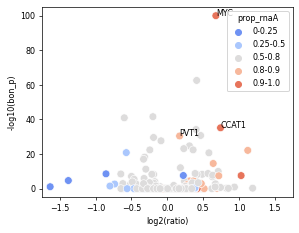

In [49]:
# PLOT ratio and  negative of log10(bon_p)
plt.figure(figsize=(4.5, 3.5))

sns.scatterplot(x='log2(ratio)', y='-log10(bon_p)', data=df_fil, hue='prop_rnaA', s=60, palette='coolwarm', \
                    hue_order=['0-0.25', '0.25-0.5', '0.5-0.8', '0.8-0.9', '0.9-1.0'])

plt.annotate('CCAT1',(0.742680, 35.185181 ))
plt.annotate('MYC',(0.677190, 100.000000 ))
plt.annotate('PVT1',(0.171868, 30.455509 ))

plt.xlim(-1.75, 1.75)


In [50]:
####

In [51]:
#hela tad level ase, chr8
hela_tad_ase_df=pd.read_csv('./tad_ase.tsv', sep='\t')
hela_tad_ase_df

,tad,total_rna,rna[A],rnaA/total,dnaA/total,no_of_genes,ratio,binom_pval,bon_p,-log10(bon_p),log2(ratio),prop_rnaA
0,TAD3036,237,145,0.666808,0.744010,2,0.896235,9.472744e-06,8.051833e-04,3.094105,-0.158051,0.5-0.8
1,TAD3038,390,252,0.643470,0.725934,2,0.886402,6.360002e-04,5.406002e-02,1.267124,-0.173966,0.5-0.8
2,TAD3039,163,146,0.897629,0.723951,1,1.239904,1.459305e-07,1.240409e-05,4.906435,0.310228,0.8-0.9
3,TAD3040,312,166,0.550309,0.637960,1,0.862608,1.244482e-04,1.057810e-02,1.975593,-0.213223,0.5-0.8
4,TAD3043,18,14,0.777778,0.891304,1,0.872629,1.240385e-01,1.000000e+00,-0.000000,-0.196560,0.5-0.8
5,TAD3047,220,152,0.645533,0.637397,2,1.012764,1.067334e-01,1.000000e+00,-0.000000,0.018298,0.5-0.8
6,TAD3048,249,165,0.644331,0.717413,1,0.898130,5.749071e-02,1.000000e+00,-0.000000,-0.155004,0.5-0.8
7,TAD3049,317,187,0.581471,0.763685,4,0.761402,7.592217e-12,6.453384e-10,9.190212,-0.393271,0.5-0.8
8,TAD3050,704,417,0.564056,0.733263,2,0.769240,6.199085e-16,5.269223e-14,13.278253,-0.378494,0.5-0.8
9,TAD3051,870,529,0.616764,0.688486,2,0.895827,5.015964e-07,4.263569e-05,4.370227,-0.158708,0.5-0.8


In [52]:
hela_tad_ase_df['prop_rnaA'].value_counts()

0.5-0.8     66
0.8-0.9      8
0.25-0.5     7
0.9-1.0      2
0-0.25       2
Name: prop_rnaA, dtype: int64

In [53]:
hela_tad_ase_df[hela_tad_ase_df['tad']=='TAD3189']

,tad,total_rna,rna[A],rnaA/total,dnaA/total,no_of_genes,ratio,binom_pval,bon_p,-log10(bon_p),log2(ratio),prop_rnaA
74,TAD3189,2779,2687,0.95152,0.696452,4,1.366238,4.150284e-296,3.527742e-294,293.452503,0.450209,0.9-1.0


(-1.25, 1.25)

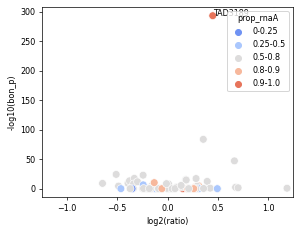

In [54]:
#plot ratio and negative log10 pvalue
plt.figure(figsize=(4.5, 3.5))
sns.scatterplot(x='log2(ratio)', y='-log10(bon_p)', data=hela_tad_ase_df, hue='prop_rnaA', s=60,palette='coolwarm',\
                  hue_order=['0-0.25', '0.25-0.5', '0.5-0.8', '0.8-0.9', '0.9-1.0'])

plt.annotate('TAD3189',(0.450209, 293.452503))

plt.xlim(-1.25, 1.25)


In [55]:
###

In [56]:
#hela se ase, chr8
df=pd.read_csv('./se_ase.tsv', sep='\t')
df

,se,total_rna,rna[A],rnaA/total,dnaA/total,no_snp,ratio,binom_pval,bon_p,-log10(bon_p),log2(ratio),prop_rnaA
0,SE_01_03600255,46,29,0.656667,0.530625,5,1.237535,1.864895e-01,7.459580e-01,0.127286,0.307470,0.5-0.8
1,SE_01_03600003,451,450,0.997347,0.573684,13,1.738495,7.290682e-107,2.916273e-106,105.535172,0.797839,0.9-1.0
2,SE_01_03600506,80,80,1.000000,0.609748,4,1.640023,9.687163e-18,3.874865e-17,16.411743,0.713716,0.9-1.0
3,SE_01_03600048,29,23,0.816667,0.712627,4,1.145995,4.154241e-01,1.000000e+00,-0.000000,0.196600,0.8-0.9


Text(0.797839, 105.535172, 'HPV_SE')

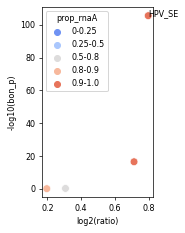

In [57]:
#plot log2 ratio and -log10 of bon_p
plt.figure(figsize=(2, 3.5))

sns.scatterplot(x='log2(ratio)', y='-log10(bon_p)', data=df, hue='prop_rnaA', s=60, palette='coolwarm',\
                hue_order=['0-0.25', '0.25-0.5', '0.5-0.8', '0.8-0.9', '0.9-1.0'])

plt.annotate('HPV_SE', (0.797839, 105.535172))


In [58]:
##